In [1]:
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import numpy as np

In [2]:
import pandas as pd
dfpower = pd.read_csv('ProcessedDataCenterHall.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
def apparentpower(xseries):
    return np.sqrt(np.sum(np.square(xseries)))

In [4]:
dfpower['apparentpower'] = dfpower.apply(apparentpower,axis=1,raw=True)

In [5]:
#get last 2 years of data
numvals = 4*24*365*2

segment = dfpower.iloc[-1*numvals:,2]
segment = segment.values.reshape(-1,1)


In [6]:
kern_dens = KernelDensity()
kern_dens.fit(segment)

scores = kern_dens.score_samples(segment)

In [7]:
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK

In [8]:
objective_value = 5
def objective(args):
   threshold = quantile(scores, args['forthreshold'])
   idx = where(scores <= threshold)

   return (objective_value-idx[0].shape[0])**2

In [9]:
space = {
    'forthreshold': hp.uniform('forthreshold', 1e-6,1e-3),
}

In [10]:
best = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)

100%|██████████| 100/100 [00:00<00:00, 424.98trial/s, best loss: 0.0]


In [11]:
threshold = quantile(scores, best['forthreshold'])
idx = where(scores <= threshold)

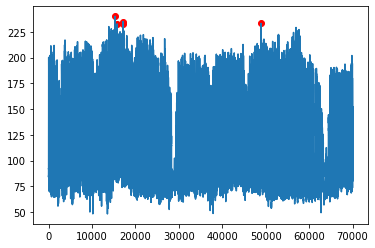

In [12]:

values = segment[idx]

x_ax = range(segment.shape[0])

plt.plot(x_ax, segment)
plt.scatter(idx,values, color='r')
plt.show()

In [13]:
#obtain dataset
dfpower.iloc[-1*numvals+idx[0][-1]:,:2].to_csv("main_dataset.csv")

In [14]:
idx[0][-1]

48921